In [1]:
pip install numpy pandas scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
data = pd.DataFrame(data=np.hstack([X, y]), columns=['Feature', 'Target'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred = model.predict(X_test)

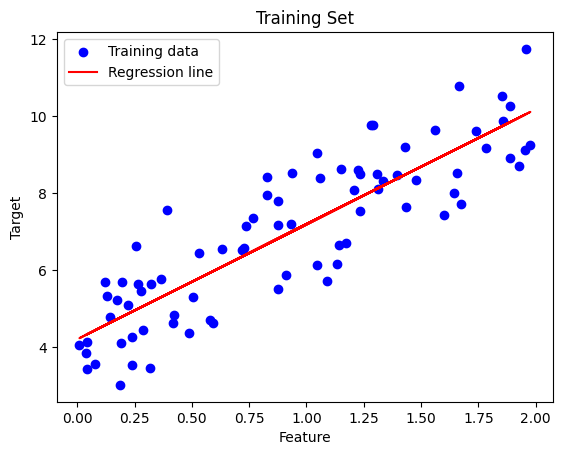

In [11]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Set')
plt.legend()
plt.show()

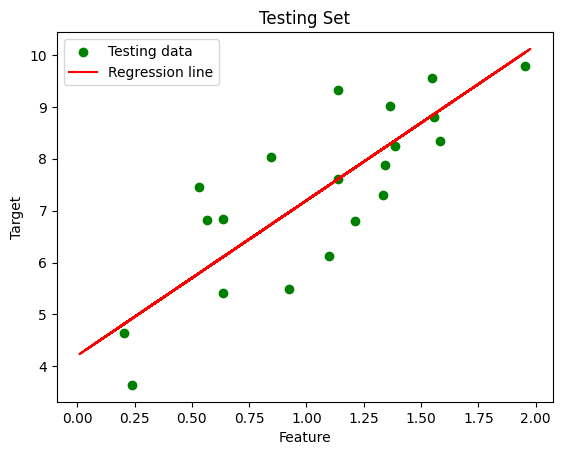

In [12]:
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Testing Set')
plt.legend()
plt.show()

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: 0.95
Tuned Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1

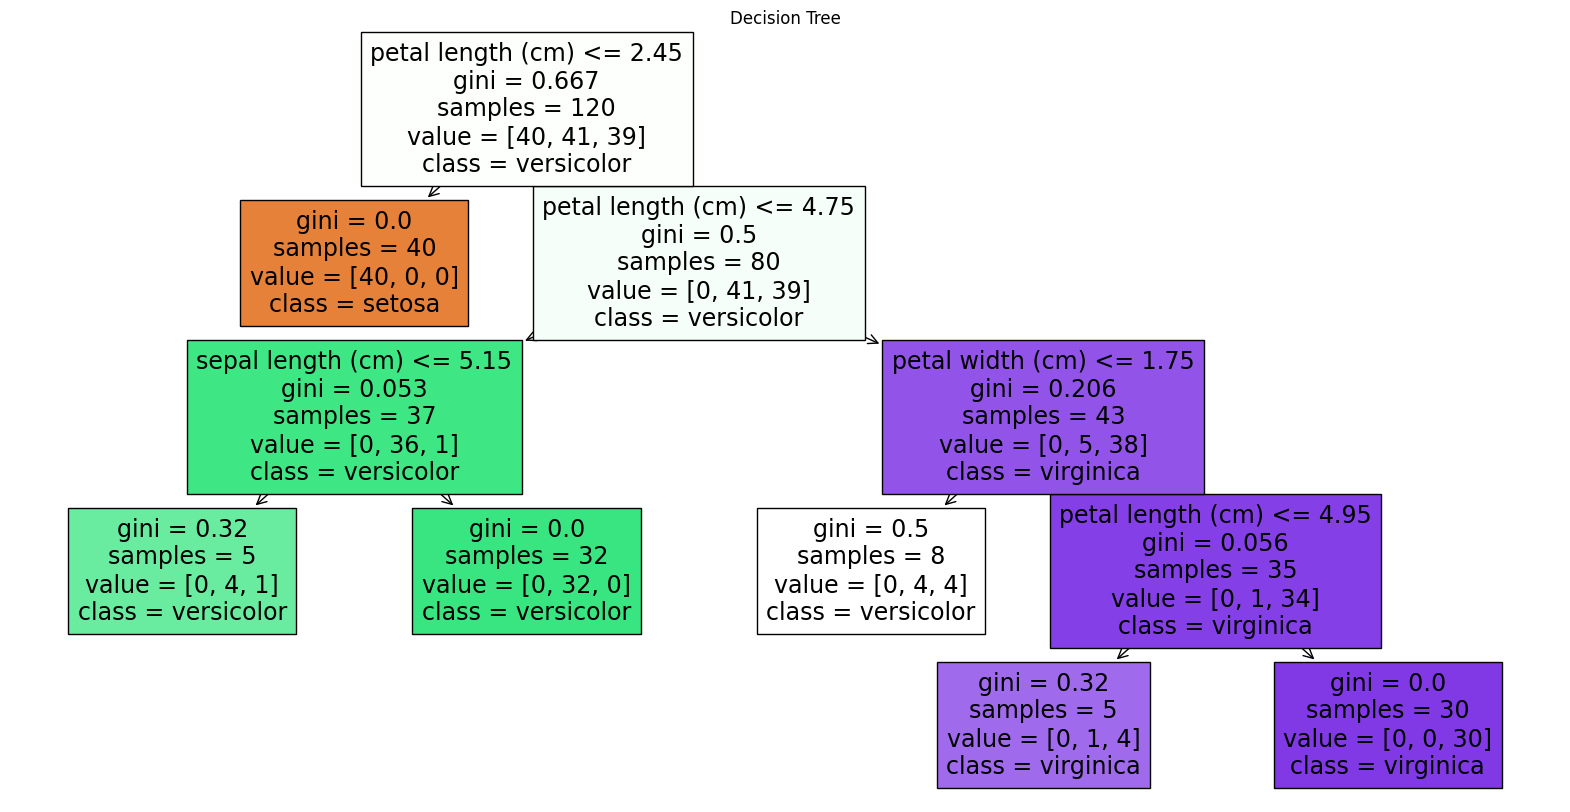

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
model = DecisionTreeClassifier(random_state=42)


model.fit(X_train, y_train)

# Make predictio
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()




Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


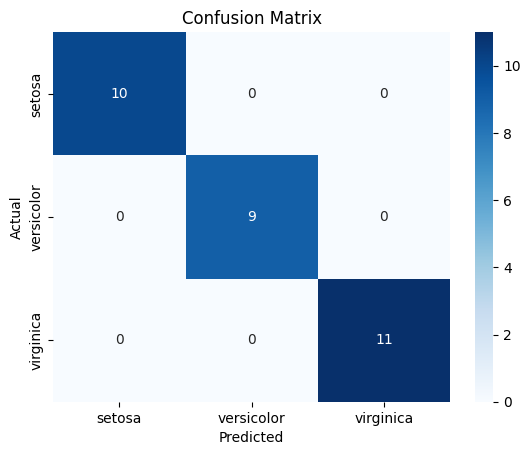

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to pandas DataFrame for easier manipulation
data = pd.DataFrame(data=np.hstack([X, y.reshape(-1, 1)]), columns=iris.feature_names + ['target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


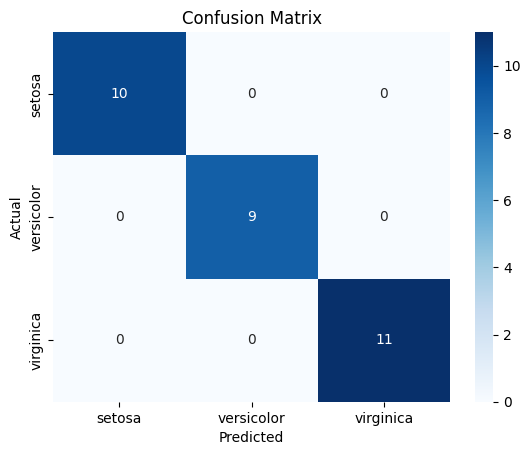

ValueError: cannot reshape array of size 750000 into shape (500,500)

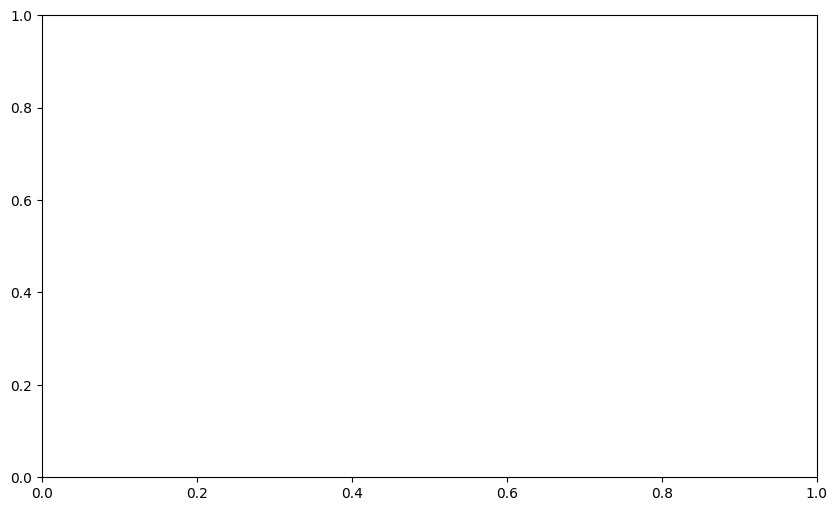

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Visualization for 2D Data (requires dimensionality reduction)
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the SVM model on 2D data
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_reduced, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 500),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot training points
scatter = ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolors='k')
legend = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (2D Projection)')
plt.show()


Original DataFrame:
      A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  NaN
2  NaN  3.0  NaN
3  4.0  4.0  4.0
4  5.0  5.0  5.0

DataFrame with Rows Removed:
      A    B    C
3  4.0  4.0  4.0
4  5.0  5.0  5.0

DataFrame with Columns Removed:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

DataFrame with Mean Imputation:
      A    B         C
0  1.0  3.5  1.000000
1  2.0  2.0  3.333333
2  3.0  3.0  3.333333
3  4.0  4.0  4.000000
4  5.0  5.0  5.000000

DataFrame with Median Imputation:
      A    B    C
0  1.0  3.5  1.0
1  2.0  2.0  4.0
2  3.0  3.0  4.0
3  4.0  4.0  4.0
4  5.0  5.0  5.0

DataFrame with Mode Imputation:
      A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  1.0
2  1.0  3.0  1.0
3  4.0  4.0  4.0
4  5.0  5.0  5.0

DataFrame with KNN Imputation:
      A    B    C
0  1.0  3.0  1.0
1  2.0  2.0  2.5
2  3.0  3.0  4.5
3  4.0  4.0  4.0
4  5.0  5.0  5.0


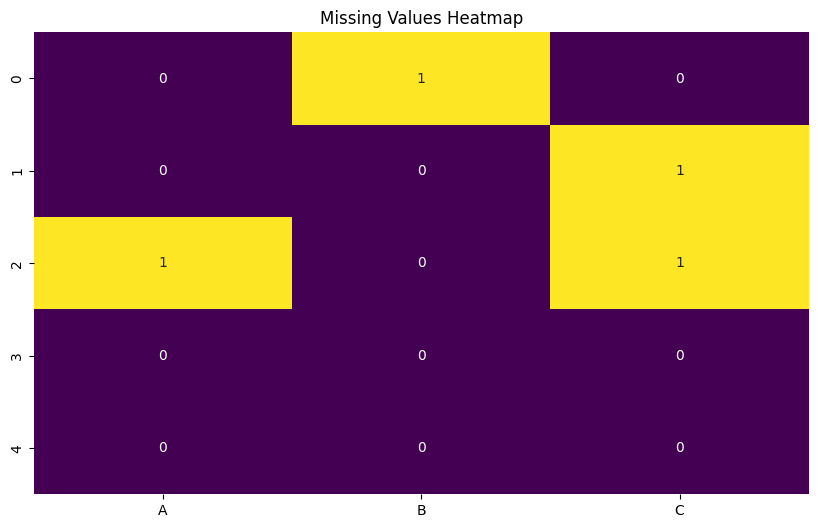

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, np.nan, 4, 5]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Remove rows with missing values
df_dropped_rows = df.dropna()
print("\nDataFrame with Rows Removed:\n", df_dropped_rows)

# Remove columns with missing values
df_dropped_columns = df.dropna(axis=1)
print("\nDataFrame with Columns Removed:\n", df_dropped_columns)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed_mean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame with Mean Imputation:\n", df_imputed_mean)

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
df_imputed_median = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame with Median Imputation:\n", df_imputed_median)

# Impute missing values with the mode of each column
imputer = SimpleImputer(strategy='most_frequent')
df_imputed_mode = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame with Mode Imputation:\n", df_imputed_mode)

# Impute missing values using KNN
knn_imputer = KNNImputer(n_neighbors=2)
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame with KNN Imputation:\n", df_imputed_knn)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', annot=True)
plt.title('Missing Values Heatmap')
plt.show()


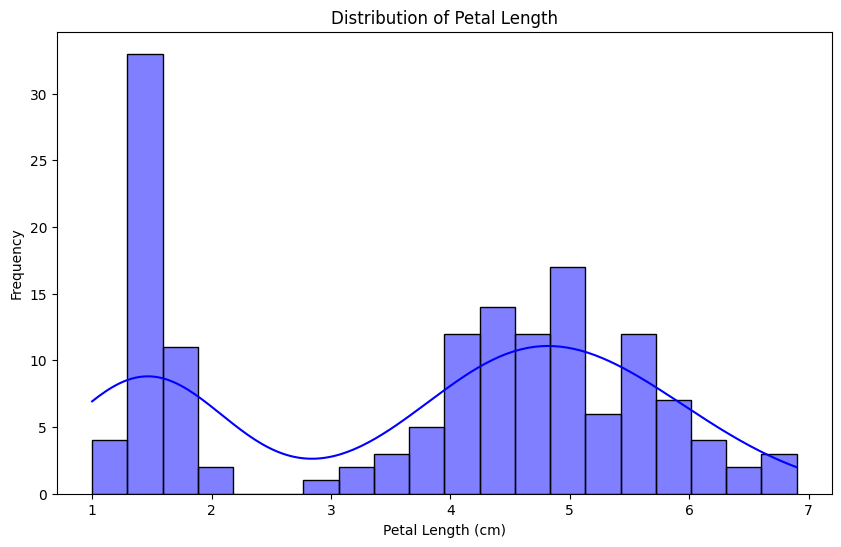

<ipython-input-17-cc04ac9a8eb9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=df, palette='Set2')


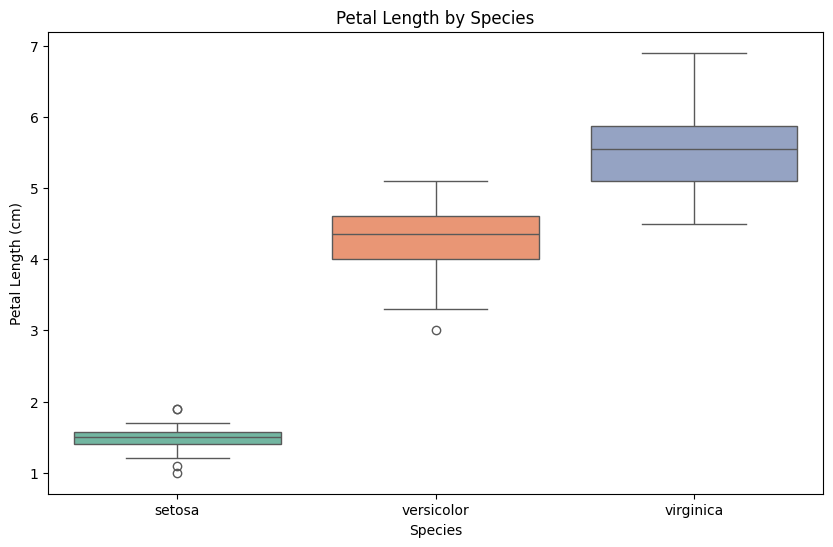

<Figure size 1200x1000 with 0 Axes>

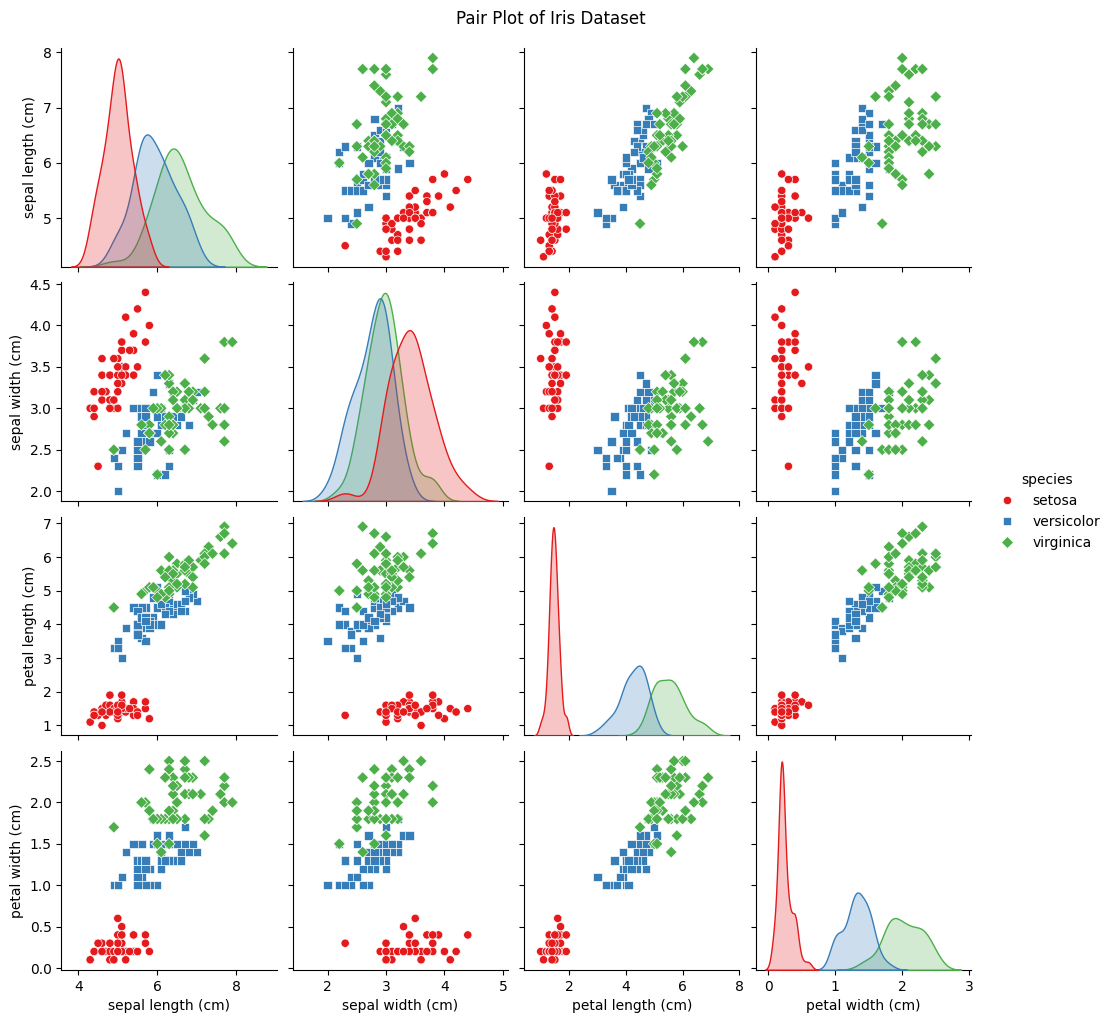

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

# Plot histogram for petal length
plt.figure(figsize=(10, 6))
sns.histplot(df['petal length (cm)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot box plot for petal length by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df, palette='Set2')
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

# Plot pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()
